In [1]:
import pandas as pd
df_cleaned = pd.read_csv('df_cleaned.csv')

In [52]:
df_cleaned.head()

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,vacina_hep_b_crianca,relato_sarampo,...,vacina_difteria_crianca,morte_HIV_4anos,PIB,populacao,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade,pais_encoded,status_encoded
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154.0,...,65.0,0.1,584.259210,33753499.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492.0,...,62.0,0.1,612.696514,32716210.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430.0,...,64.0,0.1,631.744976,31541209.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787.0,...,67.0,0.1,669.959000,30466479.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013.0,...,68.0,0.1,63.537231,29249157.0,18.2,18.2,0.454,9.5,0,1


In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [54]:
label_encoder = LabelEncoder()

dic_dev = {"Developing": 1, "Developed": 0}

# Aplicar ao DataFrame
df_cleaned['pais_encoded'] = label_encoder.fit_transform(df_cleaned['pais'])
df_cleaned['status_encoded'] = df_cleaned['status'].map(dic_dev)

In [55]:
df_cleaned2 = df_cleaned.drop(['pais', 'status'], axis=1)


In [56]:
# Suponha que seu DataFrame se chama df_cleaned2 e a variável alvo é 'target'
X = df_cleaned2.drop(columns=['expectativa_vida'])
y = df_cleaned2['expectativa_vida']

# Divisão inicial: treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


___
## Random Forest
___

n_estimators = 10
MSE Médio (Validação Cruzada): 4.1676
n_estimators = 20
MSE Médio (Validação Cruzada): 3.8263
n_estimators = 30
MSE Médio (Validação Cruzada): 3.7101
n_estimators = 40
MSE Médio (Validação Cruzada): 3.6444
n_estimators = 50
MSE Médio (Validação Cruzada): 3.6018
n_estimators = 60
MSE Médio (Validação Cruzada): 3.5806
n_estimators = 70
MSE Médio (Validação Cruzada): 3.5545
n_estimators = 80
MSE Médio (Validação Cruzada): 3.5465
n_estimators = 90
MSE Médio (Validação Cruzada): 3.5299
n_estimators = 100
MSE Médio (Validação Cruzada): 3.5320
Melhor número de árvores: 90 com MSE: 3.5299


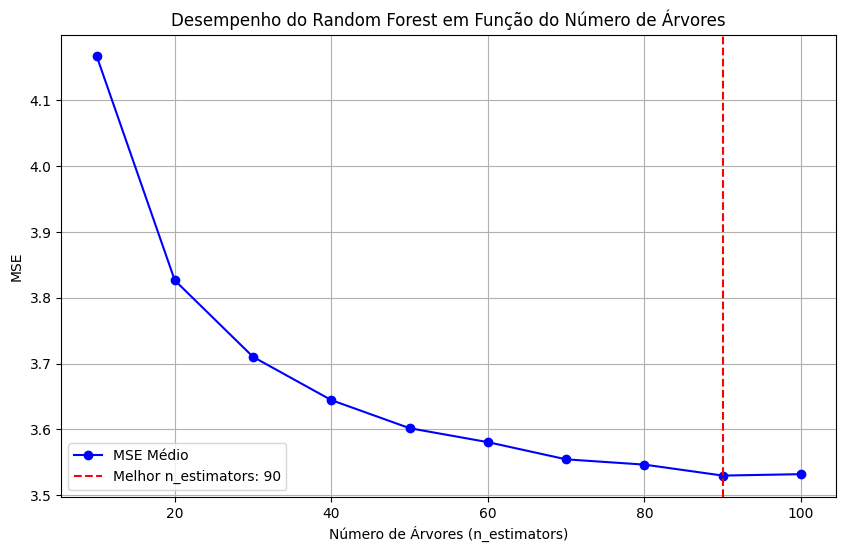

In [40]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Lista de números de árvores a testar
arvores = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
arvores_acuracias = []

# K-Fold para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for n in arvores:
    print(f"n_estimators = {n}")
    fold_metrics = []
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Modelo Random Forest para Regressão
        model = RandomForestRegressor(random_state=42, n_estimators=n)
        model.fit(X_train_fold, y_train_fold)
        
        # Previsões na validação
        y_val_pred = model.predict(X_val_fold)
        
        # Métrica de erro (Mean Squared Error)
        fold_mse = mean_squared_error(y_val_fold, y_val_pred)
        fold_metrics.append(fold_mse)

    # Média do MSE nos folds
    mean_mse = np.mean(fold_metrics)
    print(f"MSE Médio (Validação Cruzada): {mean_mse:.4f}")
    arvores_acuracias.append(mean_mse)

# Identificar o melhor número de árvores
best_n_index = np.argmin(arvores_acuracias)
best_n = arvores[best_n_index]
print(f"Melhor número de árvores: {best_n} com MSE: {arvores_acuracias[best_n_index]:.4f}")

# Plotando os erros em função do número de árvores
plt.figure(figsize=(10, 6))
plt.plot(arvores, arvores_acuracias, marker='o', linestyle='-', color='b', label='MSE Médio')
plt.axvline(x=best_n, color='r', linestyle='--', label=f'Melhor n_estimators: {best_n}')
plt.xlabel('Número de Árvores (n_estimators)')
plt.ylabel('MSE')
plt.title('Desempenho do Random Forest em Função do Número de Árvores')
plt.legend()
plt.grid()
plt.show()


In [41]:
# Ajuste no conjunto de treino completo
final_model = RandomForestRegressor(random_state=42, n_estimators=50)
final_model.fit(X_train, y_train)

# Avaliação no teste
y_test_pred = final_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Teste - MSE: {test_mse:.4f}")


Teste - MSE: 1.8899


Text(0.5, 1.0, 'Importância das Features - RandomForestRegressor')

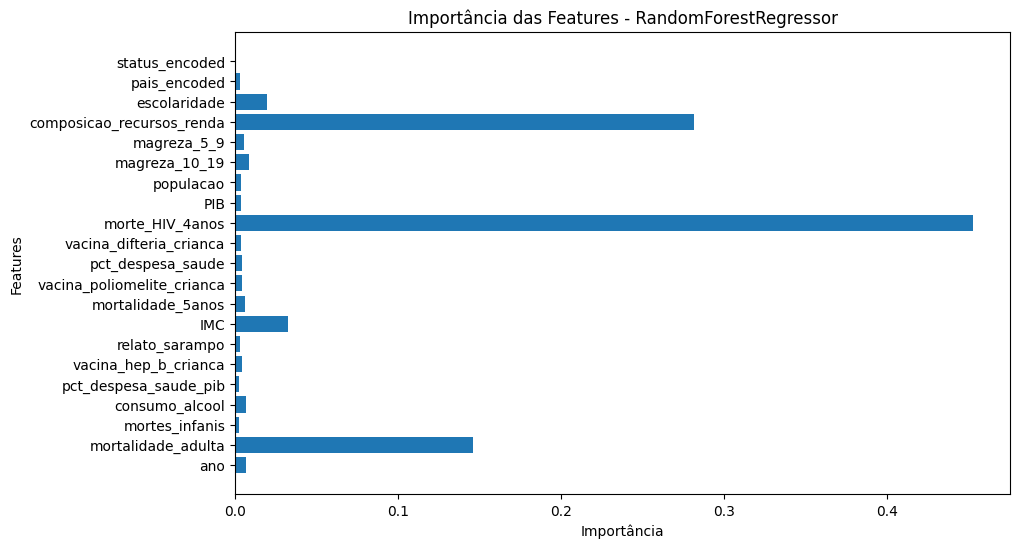

In [42]:
# Importância das features
importances = final_model.feature_importances_

# Criando um gráfico de barras para visualizar a importância das features
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, importances)  # X_train.columns são os nomes das features
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features - RandomForestRegressor')

In [48]:
df_cleaned2 = df_cleaned.drop(['pais', 'status', "morte_HIV_4anos", "composicao_recursos_renda", "mortalidade_adulta"], axis=1)
# Suponha que seu DataFrame se chama df_cleaned2 e a variável alvo é 'target'
X = df_cleaned2.drop(columns=['expectativa_vida'])
y = df_cleaned2['expectativa_vida']

# Divisão inicial: treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


n_estimators = 10
MSE Médio (Validação Cruzada): 6.6546
n_estimators = 20
MSE Médio (Validação Cruzada): 6.0138
n_estimators = 30
MSE Médio (Validação Cruzada): 5.9194
n_estimators = 40
MSE Médio (Validação Cruzada): 5.8504
n_estimators = 50
MSE Médio (Validação Cruzada): 5.7451
n_estimators = 60
MSE Médio (Validação Cruzada): 5.6904
n_estimators = 70
MSE Médio (Validação Cruzada): 5.6933
n_estimators = 80
MSE Médio (Validação Cruzada): 5.6830
n_estimators = 90
MSE Médio (Validação Cruzada): 5.6683
n_estimators = 100
MSE Médio (Validação Cruzada): 5.6304
Melhor número de árvores: 100 com MSE: 5.6304


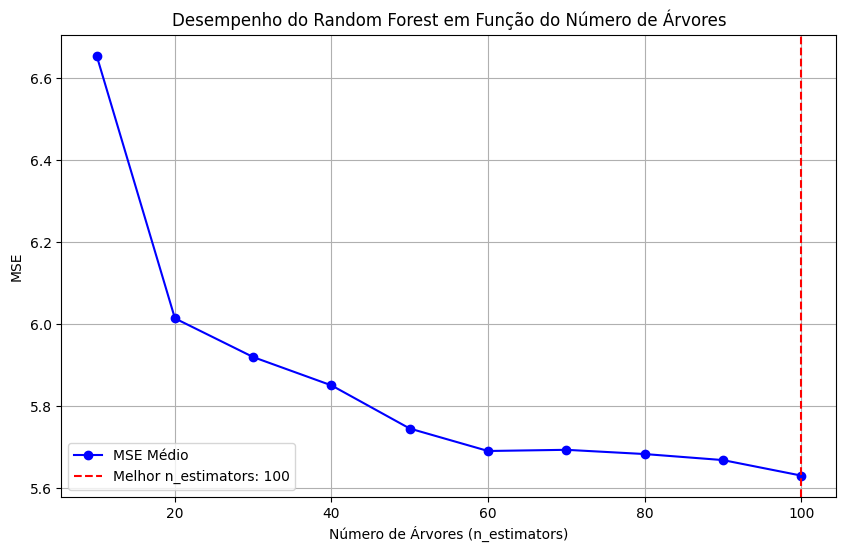

In [49]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Lista de números de árvores a testar
arvores = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
arvores_acuracias = []

# K-Fold para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for n in arvores:
    print(f"n_estimators = {n}")
    fold_metrics = []
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Modelo Random Forest para Regressão
        model = RandomForestRegressor(random_state=42, n_estimators=n)
        model.fit(X_train_fold, y_train_fold)
        
        # Previsões na validação
        y_val_pred = model.predict(X_val_fold)
        
        # Métrica de erro (Mean Squared Error)
        fold_mse = mean_squared_error(y_val_fold, y_val_pred)
        fold_metrics.append(fold_mse)

    # Média do MSE nos folds
    mean_mse = np.mean(fold_metrics)
    print(f"MSE Médio (Validação Cruzada): {mean_mse:.4f}")
    arvores_acuracias.append(mean_mse)

# Identificar o melhor número de árvores
best_n_index = np.argmin(arvores_acuracias)
best_n = arvores[best_n_index]
print(f"Melhor número de árvores: {best_n} com MSE: {arvores_acuracias[best_n_index]:.4f}")

# Plotando os erros em função do número de árvores
plt.figure(figsize=(10, 6))
plt.plot(arvores, arvores_acuracias, marker='o', linestyle='-', color='b', label='MSE Médio')
plt.axvline(x=best_n, color='r', linestyle='--', label=f'Melhor n_estimators: {best_n}')
plt.xlabel('Número de Árvores (n_estimators)')
plt.ylabel('MSE')
plt.title('Desempenho do Random Forest em Função do Número de Árvores')
plt.legend()
plt.grid()
plt.show()


In [47]:
# Ajuste no conjunto de treino completo
final_model = RandomForestRegressor(random_state=42, n_estimators=50)
final_model.fit(X_train, y_train)

# Avaliação no teste
y_test_pred = final_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Teste - MSE: {test_mse:.4f}")


Teste - MSE: 2.7251


Testando: n_estimators=10, learning_rate=0.1, loss=linear
MSE Médio: 11.2841
Testando: n_estimators=10, learning_rate=0.1, loss=square
MSE Médio: 11.5558
Testando: n_estimators=10, learning_rate=0.1, loss=exponential
MSE Médio: 11.5470
Testando: n_estimators=10, learning_rate=0.2, loss=linear
MSE Médio: 11.1621
Testando: n_estimators=10, learning_rate=0.2, loss=square
MSE Médio: 11.5505
Testando: n_estimators=10, learning_rate=0.2, loss=exponential
MSE Médio: 10.7614
Testando: n_estimators=10, learning_rate=0.3, loss=linear
MSE Médio: 11.1970
Testando: n_estimators=10, learning_rate=0.3, loss=square
MSE Médio: 11.6845
Testando: n_estimators=10, learning_rate=0.3, loss=exponential
MSE Médio: 10.8340
Testando: n_estimators=10, learning_rate=0.4, loss=linear
MSE Médio: 11.2823
Testando: n_estimators=10, learning_rate=0.4, loss=square
MSE Médio: 10.8839
Testando: n_estimators=10, learning_rate=0.4, loss=exponential
MSE Médio: 10.6931
Testando: n_estimators=10, learning_rate=0.5, loss=linea

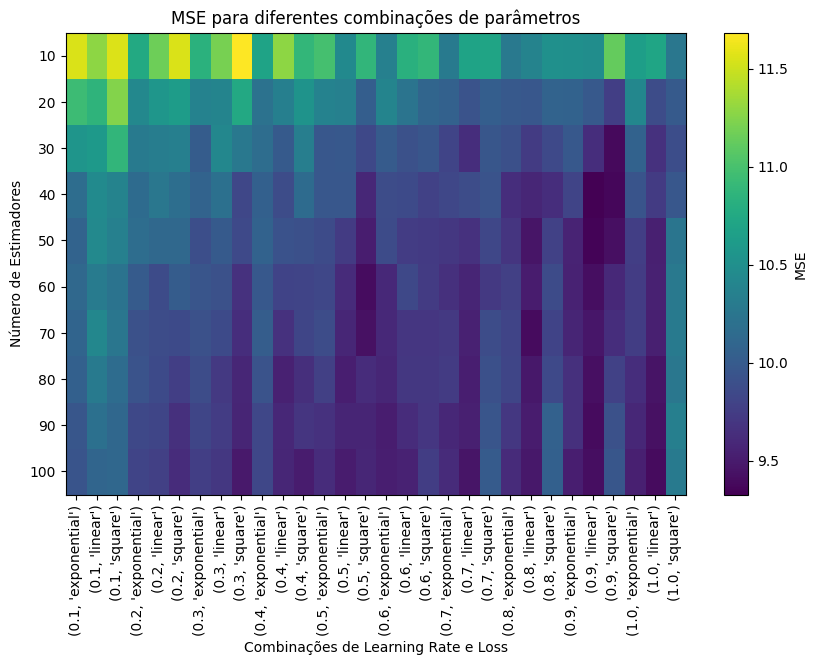

In [37]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from itertools import product  # Para gerar combinações

# Parâmetros para teste
estimadores = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
losses = ['linear', 'square', 'exponential']

# Armazenar resultados
results = []

# K-Fold para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Testar todas as combinações
for n, lr, l in product(estimadores, learning_rates, losses):  # Produto cartesiano das combinações
    print(f"Testando: n_estimators={n}, learning_rate={lr}, loss={l}")
    fold_metrics = []
    
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Modelo AdaBoost para Regressão
        model = AdaBoostRegressor(n_estimators=n, learning_rate=lr, loss=l, random_state=42)
        model.fit(X_train_fold, y_train_fold)
        
        # Previsões na validação
        y_val_pred = model.predict(X_val_fold)
        
        # Métrica de erro (Mean Squared Error)
        fold_mse = mean_squared_error(y_val_fold, y_val_pred)
        fold_metrics.append(fold_mse)
    
    # Média do MSE nos folds
    mean_mse = np.mean(fold_metrics)
    print(f"MSE Médio: {mean_mse:.4f}")
    results.append({'n_estimators': n, 'learning_rate': lr, 'loss': l, 'MSE': mean_mse})

# Transformar resultados em DataFrame para facilitar análise
results_df = pd.DataFrame(results)

# Encontrar a melhor combinação
best_row = results_df.loc[results_df['MSE'].idxmin()]
print("\nMelhor Configuração:")
print(best_row)

# Visualizar os resultados
pivot_table = results_df.pivot_table(values='MSE', index='n_estimators', columns=['learning_rate', 'loss'])
plt.figure(figsize=(10, 6))
plt.imshow(pivot_table, cmap='viridis', aspect='auto', interpolation='nearest')
plt.colorbar(label='MSE')
plt.title('MSE para diferentes combinações de parâmetros')
plt.xlabel('Combinações de Learning Rate e Loss')
plt.ylabel('Número de Estimadores')
plt.xticks(range(len(pivot_table.columns)), labels=pivot_table.columns, rotation=90)
plt.yticks(range(len(pivot_table.index)), labels=pivot_table.index)
plt.show()


Testando: n_estimators=10, learning_rate=0.1, max_depth=2
MSE Médio: 25.0815
Testando: n_estimators=10, learning_rate=0.1, max_depth=3
MSE Médio: 20.3325
Testando: n_estimators=10, learning_rate=0.1, max_depth=4
MSE Médio: 18.0133
Testando: n_estimators=10, learning_rate=0.1, max_depth=5
MSE Médio: 16.4953
Testando: n_estimators=10, learning_rate=0.2, max_depth=2
MSE Médio: 12.0092
Testando: n_estimators=10, learning_rate=0.2, max_depth=3
MSE Médio: 8.9371
Testando: n_estimators=10, learning_rate=0.2, max_depth=4
MSE Médio: 7.1015
Testando: n_estimators=10, learning_rate=0.2, max_depth=5
MSE Médio: 6.1190
Testando: n_estimators=10, learning_rate=0.3, max_depth=2
MSE Médio: 9.2511
Testando: n_estimators=10, learning_rate=0.3, max_depth=3
MSE Médio: 6.6015
Testando: n_estimators=10, learning_rate=0.3, max_depth=4
MSE Médio: 5.4943
Testando: n_estimators=10, learning_rate=0.3, max_depth=5
MSE Médio: 4.6654
Testando: n_estimators=10, learning_rate=0.4, max_depth=2
MSE Médio: 8.9859
Testand

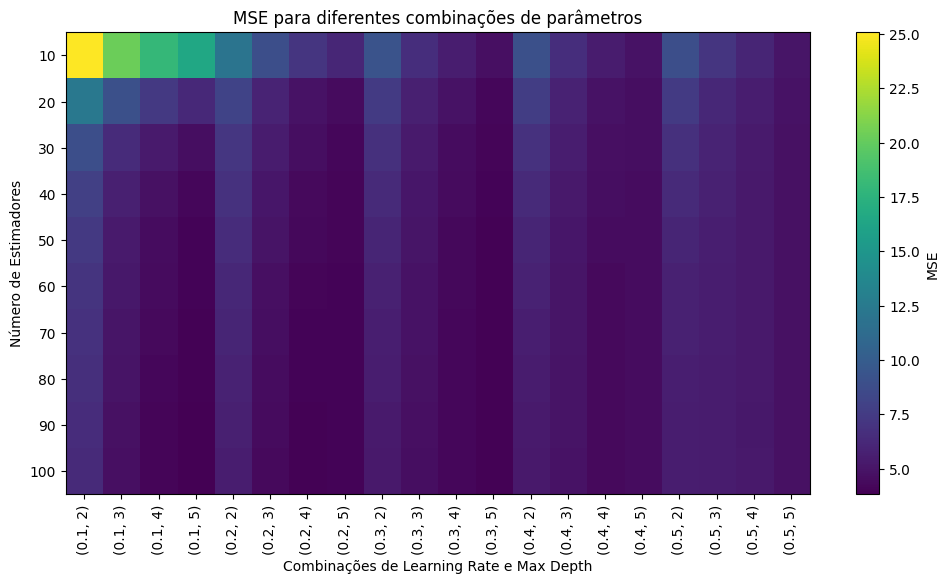

In [38]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from itertools import product

# Parâmetros para teste
estimadores = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
max_depths = [2, 3, 4, 5]

# Armazenar resultados
results = []

# K-Fold para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Testar todas as combinações
for n, lr, md in product(estimadores, learning_rates, max_depths):  # Produto cartesiano das combinações
    print(f"Testando: n_estimators={n}, learning_rate={lr}, max_depth={md}")
    fold_metrics = []
    
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Modelo Gradient Boosting para Regressão
        model = GradientBoostingRegressor(n_estimators=n, learning_rate=lr, max_depth=md, random_state=42)
        model.fit(X_train_fold, y_train_fold)
        
        # Previsões na validação
        y_val_pred = model.predict(X_val_fold)
        
        # Métrica de erro (Mean Squared Error)
        fold_mse = mean_squared_error(y_val_fold, y_val_pred)
        fold_metrics.append(fold_mse)
    
    # Média do MSE nos folds
    mean_mse = np.mean(fold_metrics)
    print(f"MSE Médio: {mean_mse:.4f}")
    results.append({'n_estimators': n, 'learning_rate': lr, 'max_depth': md, 'MSE': mean_mse})

# Transformar resultados em DataFrame para facilitar análise
results_df = pd.DataFrame(results)

# Encontrar a melhor combinação
best_row = results_df.loc[results_df['MSE'].idxmin()]
print("\nMelhor Configuração:")
print(best_row)

# Visualizar os resultados
pivot_table = results_df.pivot_table(values='MSE', index='n_estimators', columns=['learning_rate', 'max_depth'])
plt.figure(figsize=(12, 6))
plt.imshow(pivot_table, cmap='viridis', aspect='auto', interpolation='nearest')
plt.colorbar(label='MSE')
plt.title('MSE para diferentes combinações de parâmetros')
plt.xlabel('Combinações de Learning Rate e Max Depth')
plt.ylabel('Número de Estimadores')
plt.xticks(range(len(pivot_table.columns)), labels=pivot_table.columns, rotation=90)
plt.yticks(range(len(pivot_table.index)), labels=pivot_table.index)
plt.show()


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# K-Fold para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Para armazenar as métricas de cada fold
fold_metrics = []

# Iterar pelos folds
for train_index, val_index in kf.split(X_train):
    # Divisão dos dados em treino e validação
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Escalando os dados com MinMaxScaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_fold)  # Ajusta e transforma o conjunto de treino
    X_val_scaled = scaler.transform(X_val_fold)         # Transforma o conjunto de validação (sem ajustar novamente)
    
    # Modelo de Regressão Linear
    model = LinearRegression()
    model.fit(X_train_scaled, y_train_fold)
    
    # Previsões na validação
    y_val_pred = model.predict(X_val_scaled)
    
    # Métrica de erro
    fold_mse = mean_squared_error(y_val_fold, y_val_pred)
    fold_metrics.append(fold_mse)

# Média dos MSEs nos folds
mean_mse = np.mean(fold_metrics)
print(f"MSE Médio (Validação Cruzada): {mean_mse:.4f}")

# Ajustando nos dados de treino completos e testando no conjunto de teste
scaler = MinMaxScaler()
X_train_scaled_full = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo final
model = LinearRegression()
model.fit(X_train_scaled_full, y_train)

# Previsões no conjunto de teste
y_test_pred = model.predict(X_test_scaled)

# Métrica de erro no conjunto de teste
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"MSE no Conjunto de Teste: {test_mse:.4f}")


MSE Médio (Validação Cruzada): 12.4988
MSE no Conjunto de Teste: 12.1873


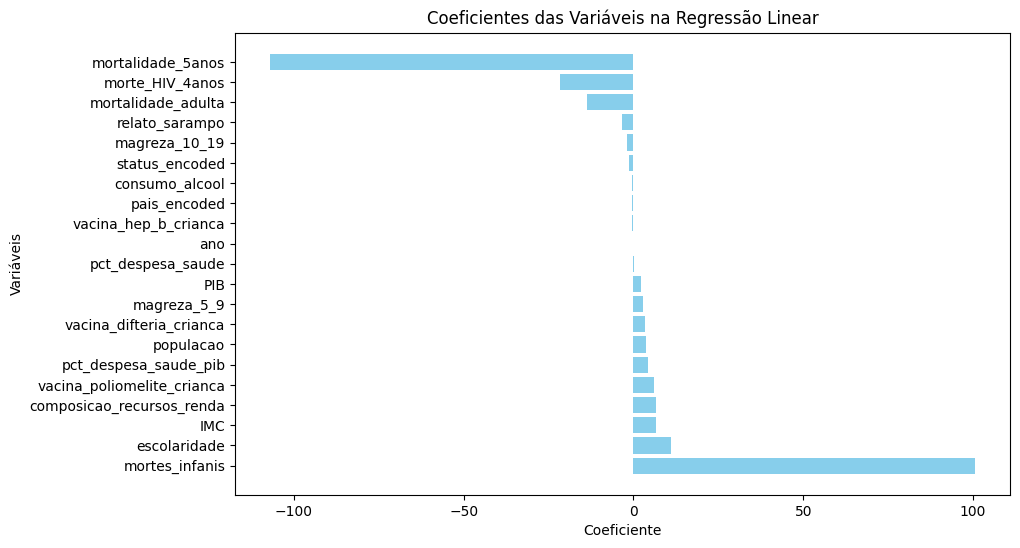

Intercepto: 52.59859413204701


In [59]:
# Obtendo os coeficientes e intercepto
coef = model.coef_  # Coeficientes das variáveis
intercept = model.intercept_  # Intercepto (constante)

# Criando um DataFrame para os coeficientes com os nomes das variáveis
coef_df = pd.DataFrame(coef, index=X_train.columns, columns=['Coeficiente'])

# Ordenando os coeficientes por valor absoluto (para facilitar a visualização)
coef_df = coef_df.sort_values(by='Coeficiente', ascending=False)

# Plotando os coeficientes
plt.figure(figsize=(10, 6))
plt.barh(coef_df.index, coef_df['Coeficiente'], color='skyblue')
plt.xlabel('Coeficiente')
plt.ylabel('Variáveis')
plt.title('Coeficientes das Variáveis na Regressão Linear')
plt.show()

# Exibindo também o intercepto
print(f"Intercepto: {intercept}")